Calculating consistent initial conditions.
Complete
Calculating consistent initial conditions.
Complete


100%|█████████████████████████████| 00:01>00:00, nt=185, t=1.00e+00, dt=1.45e-01
100%|█████████████████████████████| 00:05>00:00, nt=233, t=1.00e+00, dt=3.84e-02


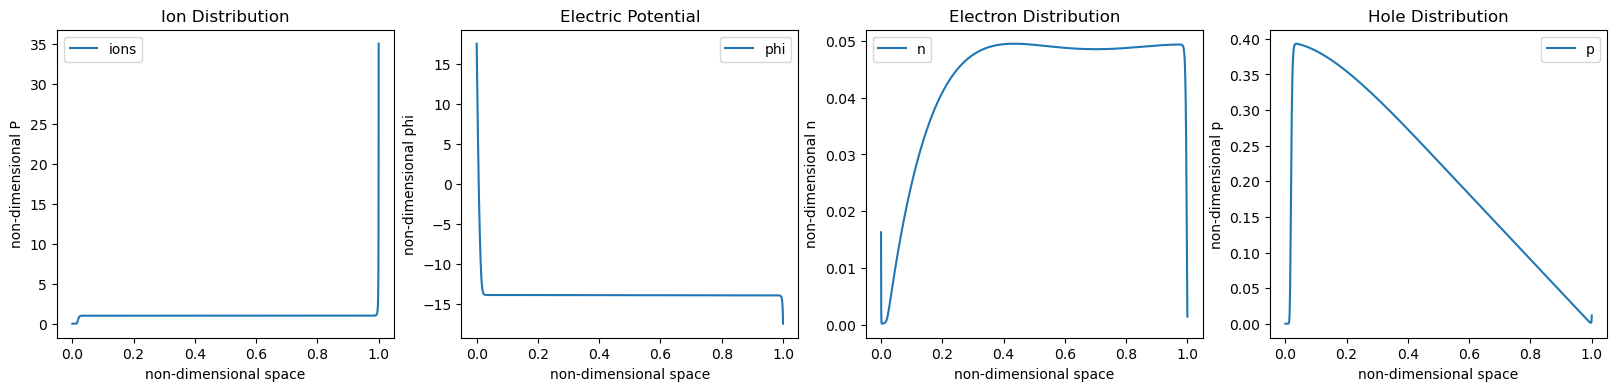

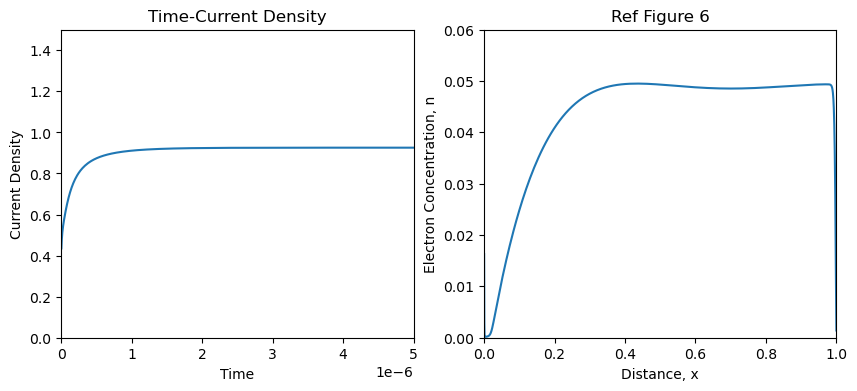

--- 7.1461193561553955 seconds ---
Eliminating transient behavior at built-in voltage.


100%|█████████████████████████████| 00:01>00:00, nt=185, t=1.00e+00, dt=1.45e-01


Preconditioning device to Vi.


100%|█████████████████████████████| 00:02>00:00, nt=123, t=1.00e+01, dt=2.18e+00


Beginning JV scan.


100%|█████████████████████████████| 00:03>00:00, nt=130, t=6.57e-01, dt=3.79e-03


Scanning opposite direction.


100%|█████████████████████████████| 00:02>00:00, nt=106, t=6.57e-01, dt=6.07e-03


Scan Complete
--- 10.02696704864502 seconds ---


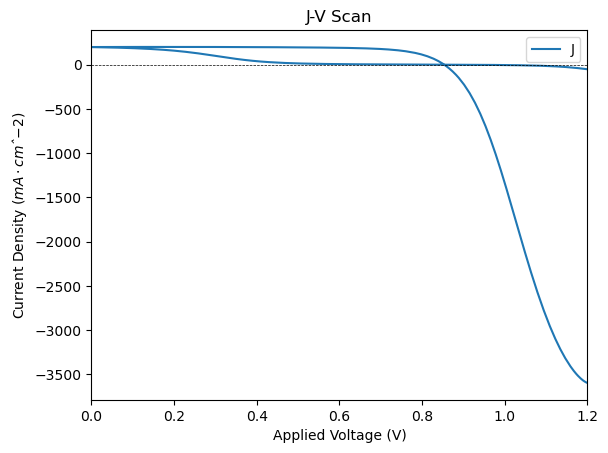

In [2]:
from diff_diffusion.utils import parameters
from diff_diffusion.analysis import animate
from diff_diffusion.solver.JV import JV
%matplotlib inline

import numpy as np

mode = "slm"

params = parameters.Params(test_case_slm=False, DI=None)
jv = JV(params)
if mode == "slm":
    from diff_diffusion.slm import slm_solver
    slm_solver.run(params)
elif mode == "tlm":
    from diff_diffusion.tlm import tlm_solver
    tlm_solver.run(params)
else:
    ValueError("allow only 'slm' or 'tlm'")

jv_return = jv(mode)

In [2]:
(
 t_non_dim, u_matrix, 
 psi, x, t, P, phi, n, p, 
 J_total, V_applied, 
 scan1_size, scan2_size
) = jv_return

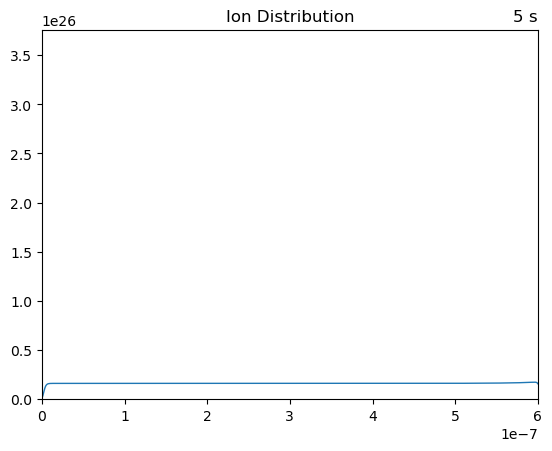

In [14]:
animate.animate_distribution(
    t_vector=t,
    x_mesh=x,
    particle=P,
    title="Ion Distribution"
)

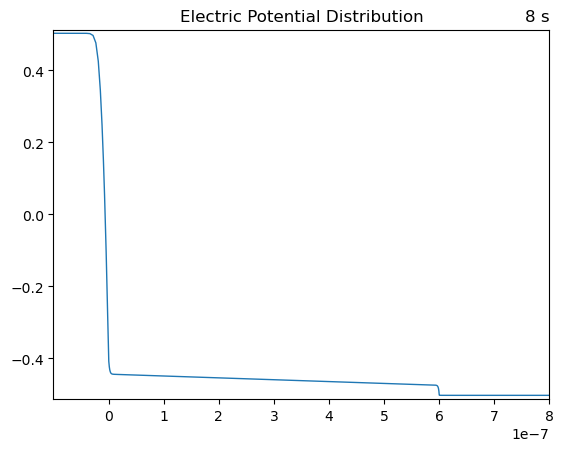

In [3]:
animate.animate_distribution(
    t_vector=t,
    x_mesh=x,
    particle=phi,
    title="Electric Potential Distribution"
)

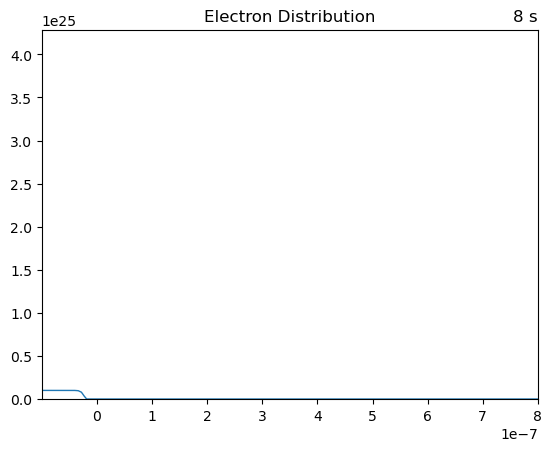

In [4]:
animate.animate_distribution(
    t_vector=t,
    x_mesh=x,
    particle=n,
    title="Electron Distribution"
)

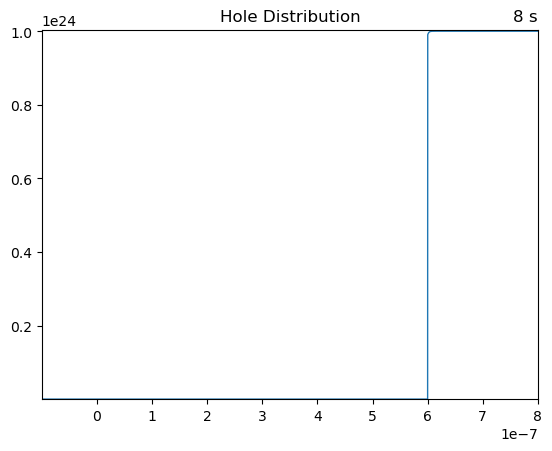

In [5]:
animate.animate_distribution(
    t_vector=t,
    x_mesh=x,
    particle=p,
    title="Hole Distribution"
)

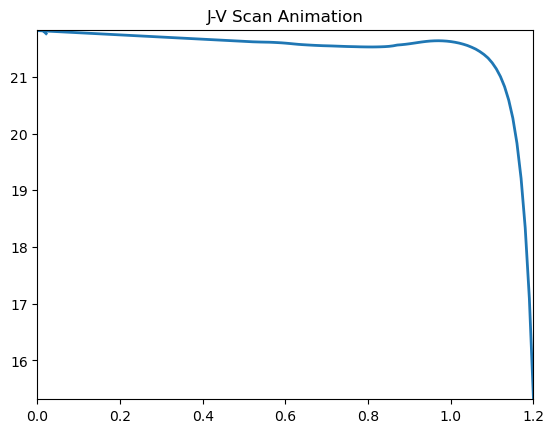

In [6]:
animate.animate_JV(t, V_applied, J_total)